In [1]:
from keras.datasets import reuters
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
#加载reuters数据集
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

观察一下数据集

In [3]:
print(len(train_data),len(test_data))

8982 2246


In [4]:
print(train_data[0])#数字化

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


想办法将转换后的数字表示逆向化，得到原始文本内容；

In [5]:
word_index = reuters.get_word_index()# 单词--下标 对应字典
index_word = dict([(val,key) for (key,val) in word_index.items()])

557056/550378 [==============================] - 2s 3us/step


In [7]:
decoded_newswire = ' '.join([index_word.get(i - 3, '?') for i in train_data[0]])

In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

数据处理--向量化

In [19]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [20]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

标签处理有两种方法：
1. one-hot编码(categorical encoding)；
2. 直接转换成数字向量；

In [21]:
def to_one_hot(labels, dimension=46):# 46个类别
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [22]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

模型定义

In [24]:
model = models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

划分验证集，训练过程中进行验证

In [25]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [26]:
# 模型训练
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])

In [27]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 118us/step - loss: 2.6102 - acc: 0.5287 - val_loss: 1.6778 - val_acc: 0.6340
Epoch 2/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.3994 - acc: 0.7035 - val_loss: 1.2831 - val_acc: 0.7150
Epoch 3/20
7982/7982 [==============================] - 1s 89us/step - loss: 1.0562 - acc: 0.7676 - val_loss: 1.1193 - val_acc: 0.7550
Epoch 4/20
7982/7982 [==============================] - 1s 89us/step - loss: 0.8303 - acc: 0.8211 - val_loss: 1.0192 - val_acc: 0.7890
Epoch 5/20
7982/7982 [==============================] - 1s 90us/step - loss: 0.6645 - acc: 0.8602 - val_loss: 0.9665 - val_acc: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.5311 - acc: 0.8916 - val_loss: 0.9177 - val_acc: 0.8150
Epoch 7/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.4298 - acc: 0.9107 - val_loss: 0.9171 - val_acc: 0.8100
Epoch 

画图观察损失函数变化以及准确率变化情况

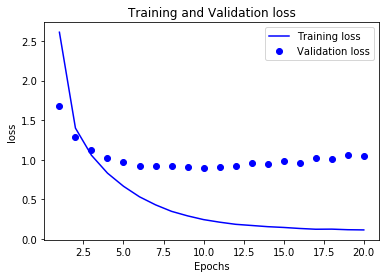

In [29]:
# 损失函数变化
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'bo',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

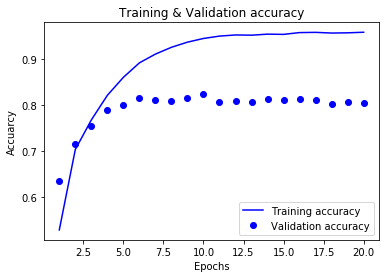

In [30]:
# 准确率变化
plt.clf()
train_acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(train_acc)+1)

plt.plot(epochs,train_acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'bo',label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()

plt.show()

从第9个epochs开始模型发生过拟合现象。让epochs=9，重新训练模型。

In [32]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,one_hot_train_labels,epochs=9,batch_size=512)
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
8982/8982 [==============================] - 1s 87us/step - loss: 2.4437 - acc: 0.5332
Epoch 2/9
8982/8982 [==============================] - 1s 75us/step - loss: 1.3241 - acc: 0.7161
Epoch 3/9
8982/8982 [==============================] - 1s 75us/step - loss: 0.9744 - acc: 0.7869
Epoch 4/9
8982/8982 [==============================] - 1s 75us/step - loss: 0.7565 - acc: 0.8390
Epoch 5/9
8982/8982 [==============================] - 1s 78us/step - loss: 0.5963 - acc: 0.8764
Epoch 6/9
8982/8982 [==============================] - 1s 79us/step - loss: 0.4751 - acc: 0.9009
Epoch 7/9
8982/8982 [==============================] - 1s 84us/step - loss: 0.3831 - acc: 0.9175
Epoch 8/9
8982/8982 [==============================] - 1s 79us/step - loss: 0.3076 - acc: 0.9348
Epoch 9/9
2246/2246 [==============================] - 0s 106us/step


In [33]:
results# 准确率80%

[0.9800313458523364, 0.7902938557966204]

测试实验一：使用更大的神经元 128

In [34]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 119us/step - loss: 2.1361 - acc: 0.5826 - val_loss: 1.3860 - val_acc: 0.6930
Epoch 2/20
7982/7982 [==============================] - 1s 94us/step - loss: 1.0770 - acc: 0.7690 - val_loss: 1.0795 - val_acc: 0.7710
Epoch 3/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.7405 - acc: 0.8455 - val_loss: 0.9620 - val_acc: 0.7960
Epoch 4/20
7982/7982 [==============================] - 1s 99us/step - loss: 0.5410 - acc: 0.8866 - val_loss: 0.9048 - val_acc: 0.8030
Epoch 5/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.3990 - acc: 0.9176 - val_loss: 0.8914 - val_acc: 0.8170
Epoch 6/20
7982/7982 [==============================] - 1s 100us/step - loss: 0.2991 - acc: 0.9369 - val_loss: 0.8508 - val_acc: 0.8260
Epoch 7/20
7982/7982 [==============================] - 1s 98us/step - loss: 0.2475 - acc: 0.9432 - val_loss: 0.9044 - val_acc: 0.8090
Epoch

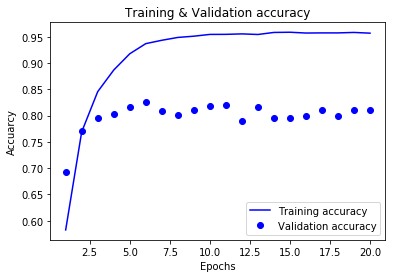

In [35]:
plt.clf()
train_acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(train_acc)+1)

plt.plot(epochs,train_acc,'b',label='Training accuracy')
plt.plot(epochs,val_acc,'bo',label='Validation accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend()

plt.show()

使用相同的epochs，在测试集上比较

In [36]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=128,validation_data=(x_val, y_val))
bigger_results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 181us/step - loss: 1.5790 - acc: 0.6609 - val_loss: 1.1920 - val_acc: 0.7250
Epoch 2/9
7982/7982 [==============================] - 1s 157us/step - loss: 0.7681 - acc: 0.8341 - val_loss: 0.9614 - val_acc: 0.7830
Epoch 3/9
7982/7982 [==============================] - 1s 157us/step - loss: 0.4603 - acc: 0.9014 - val_loss: 0.8424 - val_acc: 0.8220
Epoch 4/9
7982/7982 [==============================] - 1s 156us/step - loss: 0.2983 - acc: 0.9328 - val_loss: 0.8445 - val_acc: 0.8270
Epoch 5/9
7982/7982 [==============================] - 1s 161us/step - loss: 0.2328 - acc: 0.9440 - val_loss: 0.8502 - val_acc: 0.8340
Epoch 6/9
7982/7982 [==============================] - 1s 157us/step - loss: 0.1900 - acc: 0.9499 - val_loss: 0.9797 - val_acc: 0.7990
Epoch 7/9
7982/7982 [==============================] - 1s 167us/step - loss: 0.1685 - acc: 0.9523 - val_loss: 0.9892 - val_acc: 0.8090
Epoch 8

In [37]:
bigger_results # 准确率高了0.2个百分点

[1.1628838362485727, 0.792965271647021]

实验二：使用更小的神经元：32个

In [39]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=128,validation_data=(x_val, y_val))
smaller_results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 106us/step - loss: 2.3400 - acc: 0.5654 - val_loss: 1.4937 - val_acc: 0.6670
Epoch 2/9
7982/7982 [==============================] - 1s 85us/step - loss: 1.2308 - acc: 0.7329 - val_loss: 1.1727 - val_acc: 0.7330
Epoch 3/9
7982/7982 [==============================] - 1s 86us/step - loss: 0.9305 - acc: 0.7953 - val_loss: 1.0422 - val_acc: 0.7780
Epoch 4/9
7982/7982 [==============================] - 1s 87us/step - loss: 0.7243 - acc: 0.8414 - val_loss: 0.9593 - val_acc: 0.7980
Epoch 5/9
7982/7982 [==============================] - 1s 87us/step - loss: 0.5710 - acc: 0.8790 - val_loss: 0.9164 - val_acc: 0.8110
Epoch 6/9
7982/7982 [==============================] - 1s 86us/step - loss: 0.4510 - acc: 0.9008 - val_loss: 0.8948 - val_acc: 0.8150
Epoch 7/9
7982/7982 [==============================] - 1s 87us/step - loss: 0.3620 - acc: 0.9207 - val_loss: 0.9105 - val_acc: 0.8150
Epoch 8/9
798

In [40]:
smaller_results#低了1个百分点

[1.0783929826952152, 0.7804986642920748]

实验三：更少的网络层

In [41]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=128,validation_data=(x_val, y_val))
more_results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 124us/step - loss: 1.8895 - acc: 0.6465 - val_loss: 1.2433 - val_acc: 0.7310
Epoch 2/9
7982/7982 [==============================] - 1s 103us/step - loss: 0.9446 - acc: 0.8014 - val_loss: 0.9712 - val_acc: 0.8020
Epoch 3/9
7982/7982 [==============================] - 1s 102us/step - loss: 0.6404 - acc: 0.8702 - val_loss: 0.8705 - val_acc: 0.8220
Epoch 4/9
7982/7982 [==============================] - 1s 102us/step - loss: 0.4563 - acc: 0.9062 - val_loss: 0.8220 - val_acc: 0.8330
Epoch 5/9
7982/7982 [==============================] - 1s 101us/step - loss: 0.3399 - acc: 0.9281 - val_loss: 0.8024 - val_acc: 0.8330
Epoch 6/9
7982/7982 [==============================] - 1s 101us/step - loss: 0.2663 - acc: 0.9396 - val_loss: 0.8322 - val_acc: 0.8320
Epoch 7/9
7982/7982 [==============================] - 1s 102us/step - loss: 0.2168 - acc: 0.9468 - val_loss: 0.8335 - val_acc: 0.8260
Epoch 8

In [42]:
more_results# 准确率高了0.1个百分点----奇怪

[1.0033855682383237, 0.7938557435440784]

实验四：更多的网络层

In [44]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(partial_x_train,partial_y_train,epochs=9,batch_size=128,validation_data=(x_val, y_val))
less_results = model.evaluate(x_test,one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 128us/step - loss: 1.8566 - acc: 0.6104 - val_loss: 1.2719 - val_acc: 0.7050
Epoch 2/9
7982/7982 [==============================] - 1s 94us/step - loss: 1.0129 - acc: 0.7641 - val_loss: 1.0344 - val_acc: 0.7640
Epoch 3/9
7982/7982 [==============================] - 1s 96us/step - loss: 0.6771 - acc: 0.8472 - val_loss: 0.9515 - val_acc: 0.7960
Epoch 4/9
7982/7982 [==============================] - 1s 100us/step - loss: 0.4603 - acc: 0.8980 - val_loss: 0.9013 - val_acc: 0.8160
Epoch 5/9
7982/7982 [==============================] - 1s 99us/step - loss: 0.3318 - acc: 0.9276 - val_loss: 0.9657 - val_acc: 0.8040
Epoch 6/9
7982/7982 [==============================] - 1s 102us/step - loss: 0.2536 - acc: 0.9415 - val_loss: 1.0266 - val_acc: 0.8020
Epoch 7/9
7982/7982 [==============================] - 1s 105us/step - loss: 0.2077 - acc: 0.9504 - val_loss: 1.1455 - val_acc: 0.7880
Epoch 8/9


In [45]:
less_results # 准确率低了1个百分点--WO，更奇怪了

[1.200872304496867, 0.7818343722703515]